# 1.2.3 Sobre-entrenamiento y generalización

Decimos que se produce **sobre-entrenamiento** de un modelo cuando su riesgo con respecto a los datos de entrenamiento es mucho menor que el mismo con respecto a datos no usados en entrenamiento. En general, todo modelo suficientemente flexible (complejo) tiende a sobre-entrenarse. Por un lado, tenemos el riesgo con respecto a los datos de entrenamiento:
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{train}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$
Por otro lado, tenemos el **riesgo teórico (poblacional):**
$$\mathcal{L}(\boldsymbol{\theta}; p^*)%
=\mathbb{E}_{p^*(\boldsymbol{x},\boldsymbol{y})}[\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))]$$
donde $p^*(\boldsymbol{x},\boldsymbol{y})$ es la distribución conjunta real de $\boldsymbol{x}$ e $\boldsymbol{y}$. 
Aunque no conocemos $p^*$, podemos aproximar el riesgo teórico mediante un **conjunto de test,** esto es, de datos no usados en entrenamiento (por ejemplo, previamente separados de $\mathcal{D}_{\text{train}}$):
$$\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})%
=\frac{1}{\lvert\mathcal{D}_{\text{train}}\rvert}%
\sum_ {(\boldsymbol{x},\boldsymbol{y})\in\mathcal{D}_{\text{test}}} %
\ell(\boldsymbol{y},f(\boldsymbol{x};\boldsymbol{\theta}))$$
y estimar el **gap de generalización** como la diferencia entre el riesgo en test y entrenamiento, $\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{test}})-\mathcal{L}(\boldsymbol{\theta};\mathcal{D}_{\text{train}})$. El estudio de este gap permite descartar modelos **subjustados** (demasiado sencillos) y, sobre todo, **sobreajustados** (demasiado complejos).

**Ejemplo (cont.):** regresión polinómica simple con datos sintéticos; MSE en training y test en función del grado
$$p(y\mid x,\boldsymbol\theta)%
=\mathcal{N}(y\mid \mu, \sigma^2)
\quad\text{con}\quad x\in[0, 20],\quad\mu=f(x)=-1.5\,x + 1/9\,x^2\quad\text{y}\quad\sigma^2=4$$

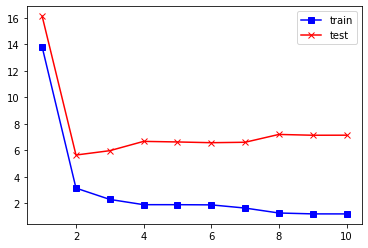

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0); N = 21; w = np.array([-1.5, 1/9.]); sigma = 2
X_train = np.linspace(0.0, 20, N)
M = 210 # datos de test sintetizados
X_test = np.linspace(0.0, 20, M)
X = np.concatenate((X_train, X_test))
y_mean = np.dot(w[0], X) + np.dot(w[1], np.square(X))
y = y_mean + np.random.normal(0, sigma, N + M)
X1 = np.ones((N + M, 1)); y_train = y[:N]; y_test = y[N:]
G = 10; gg = np.arange(1, G + 1); mse = np.zeros((G + 1, 2))
for g in gg:
    X1 = np.hstack((X1, pow(X, g).reshape(-1, 1)))
    X_train = X1[:N]; X_test = X1[N:]
    w = np.linalg.lstsq(X_train, y_train, rcond=None)[0]
    mse[g, 0] = np.square(y_train - X_train @ w).sum() / N
    mse[g, 1] = np.square(y_test - X_test @ w).sum() / M
plt.plot(gg, mse[1:, 0], color='b', marker='s', label='train')
plt.plot(gg, mse[1:, 1], color='r', marker='x', label='test'); plt.legend();

En la práctica, la selección de un modelo adecuado no se hace con el test, sino con una fracción distinta del training que llamamos **conjunto de validación.**